## Actividad 10 pto 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tamaño de visualización de los DataFrame

pd.options.display.max_rows = 80
pd.options.display.max_columns = 50

# Escribimos en latex

plt.rcParams['text.usetex'] = False

In [3]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# Importamos las tablas con la información pre y post merger de las galaxias 

In [5]:
path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/'

In [6]:
SUB = pd.read_csv(path+'Subhalo_maxmergers(todo>0.01).dat')
SIZ = pd.read_csv(path+'Sizes_maxmergers(todo>0.01).dat')
MOR = pd.read_csv(path+'MorphoKinem_maxmergers(todo>0.01).dat')
FOF = pd.read_csv(path+'FOF_maxmergers(todo>0.01).dat')

SUB_NON = pd.read_csv(path+'Subhalo_maxmergers(=1).dat')
SIZ_NON = pd.read_csv(path+'Sizes_maxmergers(=1).dat')
MOR_NON = pd.read_csv(path+'MorphoKinem_maxmergers(=1).dat')
FOF_NON = pd.read_csv(path+'FOF_maxmergers(=1).dat')

In [7]:
SIZ = SIZ.drop_duplicates()
MOR = MOR.drop_duplicates()
FOF = FOF.drop_duplicates()

SUB_NON = SUB_NON.drop_duplicates()
SIZ_NON = SIZ_NON.drop_duplicates()
MOR_NON = MOR_NON.drop_duplicates()
FOF_NON = FOF_NON.drop_duplicates()

In [41]:
#Intervalo de masas que nos interesa ver

mass_min,mass_max = 11,15

In [42]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que no sufrieron mergers
VAR_SUB_NON = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','Redshift','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                    '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                    'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass)'])

VAR_SUB_NON['GalaxyID'] = SUB_NON['GalaxyID']
VAR_SUB_NON['DescendantID'] = SUB_NON['DescendantID']
VAR_SUB_NON['GroupID'] = SUB_NON['GroupID']
VAR_SUB_NON['Lm'] = SUB_NON['Lm_max']
VAR_SUB_NON['SnapNum']=SUB_NON['SnapNum']
VAR_SUB_NON['Redshift']=SUB_NON['Redshift']
VAR_SUB_NON['SubGroupNumber'] = SUB_NON['SubGroupNumber']
VAR_SUB_NON['Log(Stars_Mass)'] = np.log10(SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB_NON['SF_Mass']+SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB_NON['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB_NON['12+Log(O/H)'] = 12+np.log10(SUB_NON['SF_Oxygen']/SUB_NON['SF_Hydrogen'])-np.log10(16)
VAR_SUB_NON['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB_NON['SF_Mass']/(SUB_NON['SF_Mass']+SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(StarFormationRate)'] = np.log10(SUB_NON['StarFormationRate'])
VAR_SUB_NON['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB_NON['StarFormationRate'])-np.log10(SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(BlackHoleMass)'] = np.log10(SUB_NON['BlackHoleMass'])

In [43]:
# Separamos según las masas que nos interesa

masas = (VAR_SUB_NON['Log(Stars_Mass)']>10)&(VAR_SUB_NON['Log(Stars_Mass)']<11)

VAR_SUB_NON = VAR_SUB_NON[masas]

In [44]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que sufrieron mergers
VAR_SUB = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','Redshift','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass)'])

VAR_SUB['GalaxyID'] = SUB['GalaxyID']
VAR_SUB['DescendantID'] = SUB['DescendantID']
VAR_SUB['GroupID'] = SUB['GroupID']
VAR_SUB['Lm'] = SUB['Lm_max']
VAR_SUB['SnapNum']=SUB['SnapNum']
VAR_SUB['Redshift']=SUB['Redshift']
VAR_SUB['SubGroupNumber'] = SUB['SubGroupNumber']
VAR_SUB['Log(Stars_Mass)'] = np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB['12+Log(O/H)'] = 12+np.log10(SUB['SF_Oxygen']/SUB['SF_Hydrogen'])-np.log10(16)
VAR_SUB['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB['SF_Mass']/(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(StarFormationRate)'] = np.log10(SUB['StarFormationRate'])
VAR_SUB['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB['StarFormationRate'])-np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(BlackHoleMass)'] = np.log10(SUB['BlackHoleMass'])

In [45]:
# Separamos según las masas que nos interesa

masas = (VAR_SUB['Log(Stars_Mass)']>mass_min)&(VAR_SUB['Log(Stars_Mass)']<mass_max)

VAR_SUB = VAR_SUB[masas]

In [46]:
VAR_MOR = pd.merge(VAR_SUB,MOR, on = ['GalaxyID'])
VAR_SIZ = pd.merge(VAR_SUB,SIZ, on = ['GalaxyID'])
VAR_FOF = pd.merge(VAR_SUB,FOF, on = ['GroupID'])

VAR_MOR_NON = pd.merge(VAR_SUB_NON,MOR_NON)
VAR_SIZ_NON = pd.merge(VAR_SUB_NON,SIZ_NON)
VAR_FOF_NON = pd.merge(VAR_SUB_NON,FOF_NON)

In [47]:
# Tabla con nuestras variables para las galaxias que NO sufrieron mergers

dif_non_Log_SMs    = []
dif_non_Log_SF_SMs = []
dif_non_Log_S_MetZ = []
dif_non_Log_OH     = []
dif_non_SFfrac     = []
dif_non_Log_SFR    = []
dif_non_Log_sSFR   = []
dif_non_Log_BH     = []
dif_non_RHM30      = []
dif_non_KcRot      = []

for i in np.arange(0,int(len(VAR_SUB_NON))-1):
    
    mask_ID = (VAR_SUB_NON['SnapNum']>=12)&((VAR_SUB_NON['DescendantID'] == VAR_SUB_NON['GalaxyID'].iloc[i+1])|(VAR_SUB_NON['GalaxyID'] == VAR_SUB_NON['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SUB_NON[mask_ID])==int(2):
        
        dif_non_Log_SMs.append(VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[0])
        dif_non_Log_SF_SMs.append(VAR_SUB_NON[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
        dif_non_Log_S_MetZ.append(VAR_SUB_NON[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB_NON[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
        dif_non_Log_OH.append(VAR_SUB_NON[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB_NON[mask_ID]['12+Log(O/H)'].values[0])
        dif_non_SFfrac.append(VAR_SUB_NON[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
        dif_non_Log_SFR.append(VAR_SUB_NON[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB_NON[mask_ID]['Log(StarFormationRate)'].values[0])
        dif_non_Log_sSFR.append(VAR_SUB_NON[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
        dif_non_Log_BH.append(VAR_SUB_NON[mask_ID]['Log(BlackHoleMass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(BlackHoleMass)'].values[0])
    
for i in np.arange(0,len(VAR_SIZ_NON)-1):
    
    mask_ID = (VAR_SIZ_NON['SnapNum']>=12)&((VAR_SIZ_NON['DescendantID'] == VAR_SIZ_NON['GalaxyID'].iloc[i+1])|(VAR_SIZ_NON['GalaxyID'] == VAR_SIZ_NON['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SIZ_NON[mask_ID])==int(2):
        dif_non_RHM30.append(VAR_SIZ_NON[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ_NON[mask_ID]['R_halfmass30'].values[0])
    

for i in np.arange(0,len(VAR_MOR_NON)-1):
    
    mask_ID = (VAR_MOR_NON['SnapNum']>=12)&((VAR_MOR_NON['DescendantID'] == VAR_MOR_NON['GalaxyID'].iloc[i+1])|(VAR_MOR_NON['GalaxyID'] == VAR_MOR_NON['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_MOR_NON[mask_ID])==int(2):  
        dif_non_KcRot.append(VAR_MOR_NON[mask_ID]['KappaCoRot'].values[1]-VAR_MOR_NON[mask_ID]['KappaCoRot'].values[0])

# Tabla con nuestras variables para las galaxias que sufrieron mergers(para todas las galaxias).

dif_Log_SMs    = []
dif_Log_SF_SMs = []
dif_Log_S_MetZ = []
dif_Log_OH     = []
dif_SFfrac     = []
dif_Log_SFR    = []
dif_Log_sSFR   = []
dif_Log_BH     = []
dif_RHM30      = []
dif_KcRot      = []

for i in np.arange(0,int(len(VAR_SUB))-1):
    
    mask_ID = (VAR_SUB['SnapNum']>=12)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SUB[mask_ID])==int(2):
        
        dif_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
        dif_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
        dif_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
        dif_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
        dif_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
        dif_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
        dif_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
        dif_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[0])
    
for i in np.arange(0,len(VAR_SIZ)-1):
    
    mask_ID = (VAR_SIZ['SnapNum']>=12)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SIZ[mask_ID])==int(2):
        dif_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
    

for i in np.arange(0,len(VAR_MOR)-1):
    
    mask_ID = (VAR_MOR['SnapNum']>=12)&((VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i]))) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_MOR[mask_ID])==int(2):  
        dif_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])
        


# Tabla con nuestras variables para las galaxias que sufrieron mayor mergers(Lm>1.25)

dif_mayor_Log_SMs    = []
dif_mayor_Log_SF_SMs = []
dif_mayor_Log_S_MetZ = []
dif_mayor_Log_OH     = []
dif_mayor_SFfrac     = []
dif_mayor_Log_SFR    = []
dif_mayor_Log_sSFR   = []
dif_mayor_Log_BH     = []
dif_mayor_RHM30      = []
dif_mayor_KcRot      = []

for i in np.arange(0,int(len(VAR_SUB))-1):
    
    mask_ID = (VAR_SUB['SnapNum']>=12)&(VAR_SUB['Lm'] >=1.25)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SUB[mask_ID])==int(2):
        
        dif_mayor_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
        dif_mayor_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
        dif_mayor_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
        dif_mayor_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
        dif_mayor_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
        dif_mayor_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
        dif_mayor_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
        dif_mayor_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[0])
    
for i in np.arange(0,len(VAR_SIZ)-1):
    
    mask_ID = (VAR_SIZ['SnapNum']>=12)&(VAR_SIZ['Lm'] >=1.25)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SIZ[mask_ID])==int(2):
        dif_mayor_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
    

for i in np.arange(0,len(VAR_MOR)-1):
    
    mask_ID = (VAR_MOR['SnapNum']>=12)&(VAR_MOR['Lm'] >=1.25)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_MOR[mask_ID])==int(2):  
        dif_mayor_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])
        

# Tabla con nuestras variables para las galaxias que sufrieron minor mergers(1.1<Lm<1.25)

dif_minor_Log_SMs    = []
dif_minor_Log_SF_SMs = []
dif_minor_Log_S_MetZ = []
dif_minor_Log_OH     = []
dif_minor_SFfrac     = []
dif_minor_Log_SFR    = []
dif_minor_Log_sSFR   = []
dif_minor_Log_BH     = []
dif_minor_RHM30      = []
dif_minor_KcRot      = []

for i in np.arange(0,int(len(VAR_SUB))-1):
    
    mask_ID = (VAR_SUB['SnapNum']>=12)&(VAR_SUB['Lm'] <=1.25)&(VAR_SUB['Lm'] >=1.1)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SUB[mask_ID])==int(2):
        
        dif_minor_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
        dif_minor_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
        dif_minor_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
        dif_minor_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
        dif_minor_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
        dif_minor_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
        dif_minor_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
        dif_minor_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[0])
    
for i in np.arange(0,len(VAR_SIZ)-1):
    
    mask_ID = (VAR_SIZ['SnapNum']>=12)&(VAR_SIZ['Lm'] <=1.25)&(VAR_SIZ['Lm'] >=1.1)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SIZ[mask_ID])==int(2):
        dif_minor_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
    

for i in np.arange(0,len(VAR_MOR)-1):
    
    mask_ID = (VAR_MOR['SnapNum']>=12)&(VAR_MOR['Lm'] <=1.25)&(VAR_MOR['Lm'] >=1.1)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_MOR[mask_ID])==int(2):  
        dif_minor_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])
        
        
# Tabla con nuestras variables para las galaxias que sufrieron micro mergers(1.01<Lm<1.1)

dif_micro_Log_SMs    = []
dif_micro_Log_SF_SMs = []
dif_micro_Log_S_MetZ = []
dif_micro_Log_OH     = []
dif_micro_SFfrac     = []
dif_micro_Log_SFR    = []
dif_micro_Log_sSFR   = []
dif_micro_Log_BH     = []
dif_micro_RHM30      = []
dif_micro_KcRot      = []

for i in np.arange(0,int(len(VAR_SUB))-1):
    
    mask_ID = (VAR_SUB['SnapNum']>=12)&(VAR_SUB['Lm'] <=1.1)&(VAR_SUB['Lm'] >=1.01)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SUB[mask_ID])==int(2):
        
        dif_micro_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
        dif_micro_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
        dif_micro_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
        dif_micro_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
        dif_micro_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
        dif_micro_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
        dif_micro_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
        dif_micro_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[0])
    
for i in np.arange(0,len(VAR_SIZ)-1):
    
    mask_ID = (VAR_SIZ['SnapNum']>=12)&(VAR_SIZ['Lm'] <=1.1)&(VAR_SIZ['Lm'] >=1.01)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SIZ[mask_ID])==int(2):
        dif_micro_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
    

for i in np.arange(0,len(VAR_MOR)-1):
    
    mask_ID = (VAR_MOR['SnapNum']>=12)&(VAR_MOR['Lm'] <=1.1)&(VAR_MOR['Lm'] >=1.01)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_MOR[mask_ID])==int(2):  
        dif_micro_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])

In [48]:
# Hacemos los histogramas de las diferencias de las magnitudes post y pre merger

In [49]:
dif       = [dif_Log_SMs,       dif_Log_SF_SMs,       dif_Log_S_MetZ,       dif_Log_OH,       dif_SFfrac,       dif_Log_SFR,       dif_Log_sSFR,       dif_Log_BH,       dif_RHM30,       dif_KcRot]
dif_mayor = [dif_mayor_Log_SMs, dif_mayor_Log_SF_SMs, dif_mayor_Log_S_MetZ, dif_mayor_Log_OH, dif_mayor_SFfrac, dif_mayor_Log_SFR, dif_mayor_Log_sSFR, dif_mayor_Log_BH, dif_mayor_RHM30, dif_mayor_KcRot]
dif_minor = [dif_minor_Log_SMs, dif_minor_Log_SF_SMs, dif_minor_Log_S_MetZ, dif_minor_Log_OH, dif_minor_SFfrac, dif_minor_Log_SFR, dif_minor_Log_sSFR, dif_minor_Log_BH, dif_minor_RHM30, dif_minor_KcRot]
dif_micro = [dif_micro_Log_SMs, dif_micro_Log_SF_SMs, dif_micro_Log_S_MetZ, dif_micro_Log_OH, dif_micro_SFfrac, dif_micro_Log_SFR, dif_micro_Log_sSFR, dif_micro_Log_BH, dif_micro_RHM30, dif_micro_KcRot]
dif_non   = [dif_non_Log_SMs, dif_non_Log_SF_SMs, dif_non_Log_S_MetZ, dif_non_Log_OH, dif_non_SFfrac, dif_non_Log_SFR, dif_non_Log_sSFR, dif_non_Log_BH, dif_non_RHM30,dif_non_KcRot]
dif_name  = [r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$',r'${\Delta}Log(SF+M_\bigstar)[\rm{M}_\odot]$',r'${\Delta}Log(Z_{Star}/Z_{Sun})$',
             r'${\Delta}(12+Log(O/H))$',r'${\Delta}(SF/(SF+M_\bigstar))[\rm{M}_\odot]$',r'${\Delta}Log(SFR)$',r'${\Delta}Log(sSFR)$',
             r'${\Delta}Log(BHM)[\rm{M}_\odot]$',r'${\Delta}RHM30$',r'${\Delta}KcRot$']

In [50]:
# lim_var = [[min(dif_Log_SMs),max(dif_Log_SMs)],[min(dif_Log_SF_SMs),max(dif_Log_SF_SMs)],[min(dif_Log_S_MetZ),max(dif_Log_S_MetZ)],
#            [min(dif_Log_OH),max(dif_Log_OH)],  [min(dif_SFfrac),max(dif_SFfrac)],[-2,2],[-2,2],[-0.5,1.5],[min(dif_RHM30),max(dif_RHM30)],[min(dif_KcRot),max(dif_KcRot)]]

lim_var = [[-0.1,1],    #dif_Log_SMs
           [-0.1,0.9],    #dif_Log_SF_SMs
           [-0.3,0.4],    #dif_Log_S_MetZ
           [-0.4,0.4],    #dif_Log_OH
           [-0.4,0.2],    #dif_SFfrac
           [-1.5,1.5],    #dif_Log_SFR
           [-2,1],    #dif_Log_sSFR
           [-0.1,1],    #dif_Log_BH
           [-3,3],    #dif_RHM30
           [-0.5,0.3]]    #dif_KcRot

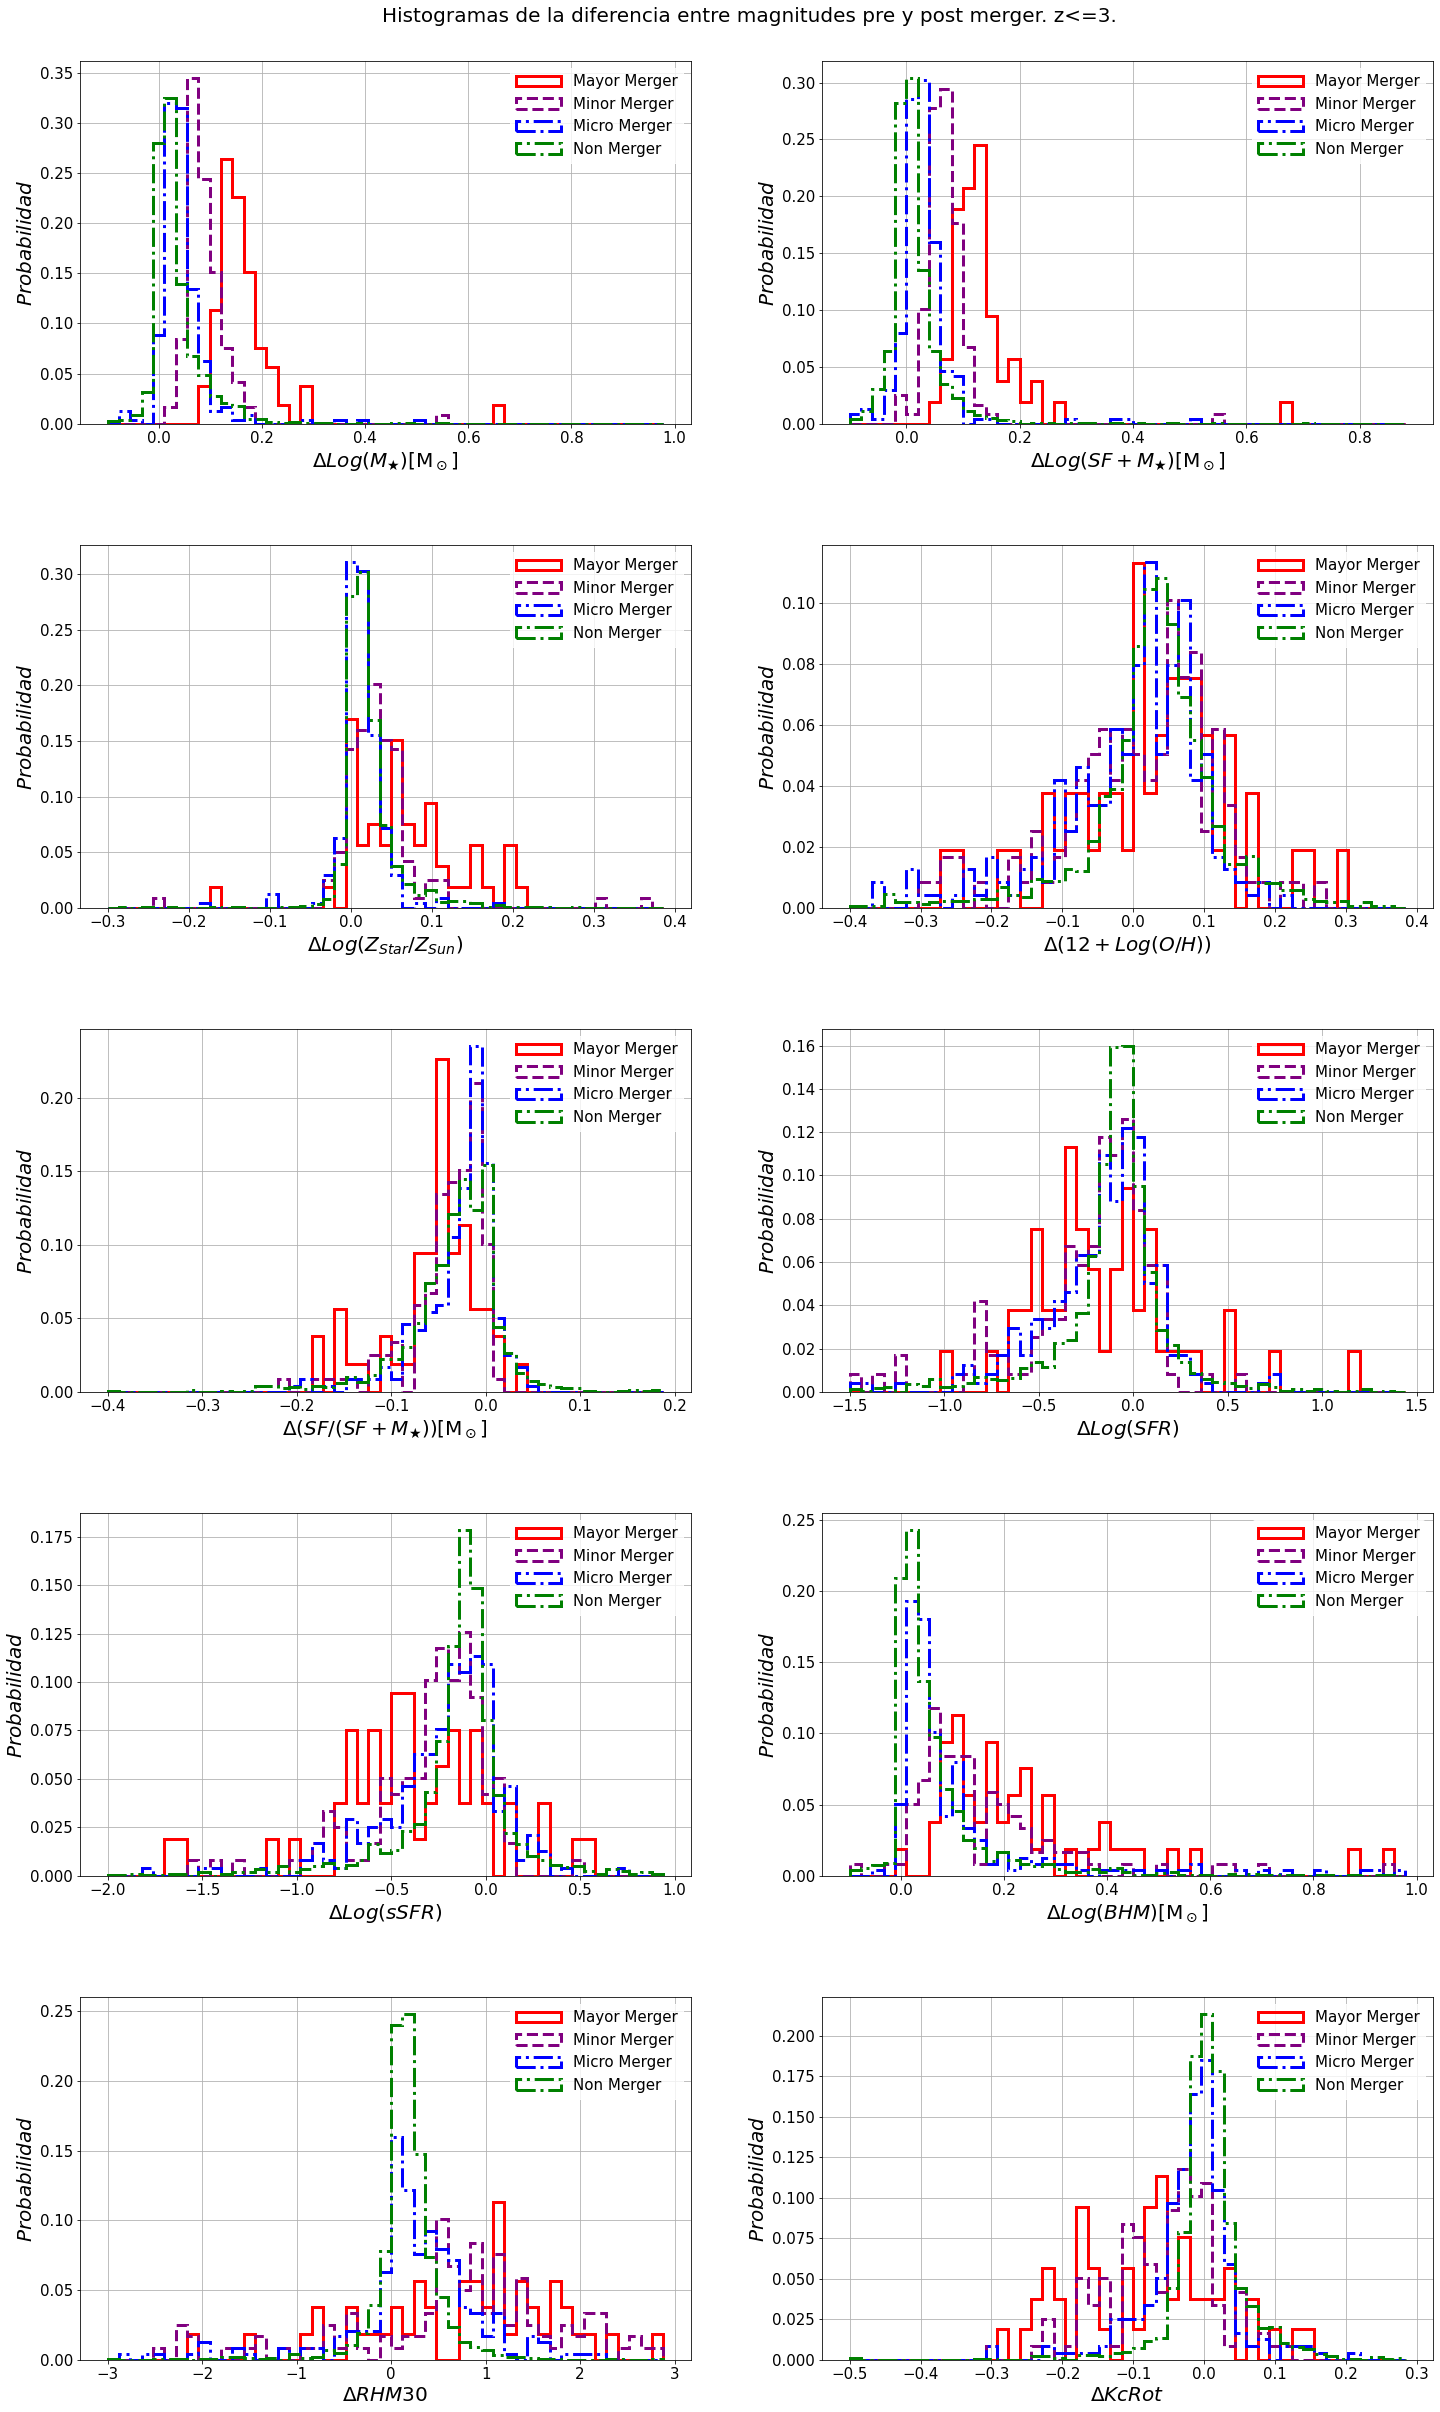

In [51]:
# Histogramas del las variables estudiadas

fig,ax = plt.subplots(5,2,figsize=(22,35))

ax = ax.flatten()

fig.tight_layout(pad=10)

# fontdict ={'fontsize': 40}

fig.suptitle('Histogramas de la diferencia entre magnitudes pre y post merger. z<=3.',fontsize=20)

columnas=50

Mayor = True
Minor = True
Micro = True
Non   = True

# Lista con las alturas de los bines

altura_mayor = []
altura_minor = []
altura_micro = []
altura_non   = []

i=0
for mayor,minor,micro,non in zip(dif_mayor,dif_minor,dif_micro,dif_non):
    
    width=abs(lim_var[i][1]-lim_var[i][0])/columnas
    
    bins = np.arange(lim_var[i][0],lim_var[i][1],width)
    
    if Mayor:
        var = mayor
        
        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Mayor Merger',linestyle='-',color='red',linewidth=3,weights=weights)
        
#         h_var_mayor,b_mayor = np.histogram(var,bins,density=True)
#         ax[i].bar(b_mayor[:-1],height=h_var_mayor * np.diff(b_mayor),width =width,fill=False,color = 'red',edgecolor='red',capsize=4,linestyle='-',linewidth=2,label='Mayor Merger')
#         altura_mayor.append(h_var_mayor * np.diff(b_mayor))
    
    if Minor:
        var = minor

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Minor Merger',linestyle='--',color='purple',linewidth=3,weights=weights)
#         h_var_minor,b_minor = np.histogram(var,bins,density=True)
#         ax[i].bar(b_minor[:-1],height=h_var_minor * np.diff(b_minor),width =width,fill=False,edgecolor='blue',capsize=4,linestyle='--',linewidth=2,label='Minor Merger')
#         altura_minor.append(h_var_minor * np.diff(b_minor))
        
    if Micro:
        var = micro

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Micro Merger',linestyle='-.',color='blue',linewidth=3,weights=weights)

#         h_var_micro,b_micro = np.histogram(var,bins,density=True)
#         ax[i].bar(b_micro[:-1],height=h_var_micro * np.diff(b_micro),width =width,fill=False,edgecolor='green',capsize=4,linestyle='--',linewidth=2,label='Micro Merger')
#         altura_micro.append(h_var_micro * np.diff(b_micro))
        
    if Non:
        var = non

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Non Merger',linestyle='-.',color='green',linewidth=3,weights=weights)

        
#         h_var_non,b_non = np.histogram(var,bins,density=True)
#         ax[i].bar(b_non[:-1],height=h_var_non * np.diff(b_non),width =width,fill=False,edgecolor='indigo',capsize=4,linestyle='--',linewidth=2,label='Non Merger')
#         altura_non.append(h_var_non * np.diff(b_non))
        
    
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    leg=ax[i].legend(loc='best',fontsize=15,edgecolor='w',handlelength=3)
    ax[i].set_xlabel(dif_name[i],fontsize=20)
    ax[i].set_ylabel(r'$Probabilidad$',fontsize=20)
    ax[i].grid()
    i=i+1
    
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/Histogramas_de_la_diferencia_entre_magnitudes_pre_y_post_merger(z<=3).png')

In [ ]:
# Fin